Here let's work on regression. Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('AmesHousing.csv')

In [4]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Let's try to predict sales price using Linear Regression and KNN Regression

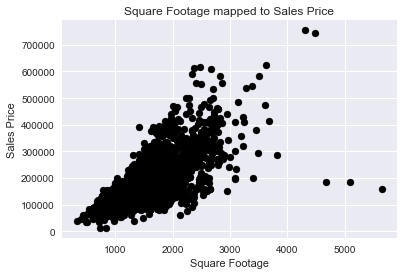

In [5]:
# Look at our data.
plt.scatter(
    df['Gr Liv Area'],
    df['SalePrice'],
    color='black'
)

plt.title('Square Footage mapped to Sales Price')
plt.xlabel('Square Footage')
plt.ylabel('Sales Price')
plt.show()

For simplicity, let's just use Square Footage to predict sales price

In [6]:
X = df['Gr Liv Area'].as_matrix()
Y = df['SalePrice'].as_matrix()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [8]:
X_train = X_train.reshape(-1, 1)

In [9]:
y_train.shape

(1758,)

In [10]:
X_train.shape

(1758, 1)

In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
X_test = X_test.reshape(-1,1)

In [13]:
y_pred = linreg.predict(X_test)

In [14]:
linreg.score(X_test, y_test)

0.52370343568397115

Now for KNN Regression

In [15]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=33, weights='distance')

In [16]:
knn_w.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=33, p=2,
          weights='distance')

In [17]:
y_pred_2 = knn_w.predict(X_test)

In [18]:
knn_w.score(X_test, y_test)

0.38749391035835984

The Linear Regression model was clearly more accurate.

In [19]:
# Print the curve for accuracy to determine the optimal number of neighbors
def nearest_neighbors(num_neighbors):
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=num_neighbors, weights='distance')
    knn_w.fit(X_train,y_train)
    y_pred_2 = knn_w.predict(X_test)
    accuracy = knn_w.score(X_test, y_test)
    return accuracy    

In [33]:
nn_df = pd.DataFrame(columns=['num_neighbors', 'accuracy'])
for x in range(1, 25):
    accuracy = nearest_neighbors(x)
    temp2 = pd.DataFrame([[x, accuracy]], columns=['num_neighbors','accuracy'])
    nn_df = nn_df.append(temp2, ignore_index=True)
    

In [34]:
nn_df.head()

,num_neighbors,accuracy
0,1,0.070345
1,2,0.254443
2,3,0.304852
3,4,0.319266
4,5,0.339636


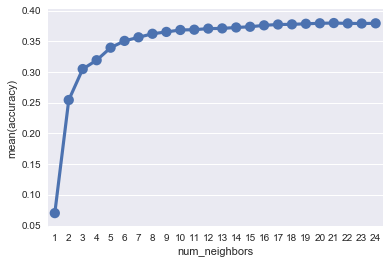

In [35]:
sns.set_style("darkgrid")
sns.pointplot(x='num_neighbors', y='accuracy', hue=None, data=nn_df)
plt.show()

In [ ]:
After running through the process a few times, k=10 seems to be the point at which we level off for accurracy.